1.  Spam Data


In [1]:
import re
import unicodedata
import pandas as pd
import nltk

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from env import user, password, host


a. Load the spam data set.


In [2]:
def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?


In [3]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [4]:
def show_counts_and_ratios(df, column):
    labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    return labels

show_counts_and_ratios(df, 'label')

,n,percent
ham,4825,0.865937
spam,747,0.134063


In [17]:
# all the ham words
ham_words = clean(' '.join(df[df.label == 'ham'].text))
# all the spam words
spam_words = clean(' '.join(df[df.label == 'spam'].text))
# all of the words
all_words = clean(' '.join(df.text))

In [18]:
spam_words_str = ' '.join(map(str, spam_words))

In [19]:
spam_bigrams = nltk.ngrams(spam_words_str.split(), 2)

In [21]:
top_spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                      .value_counts()
                      .head(25))

top_spam_bigrams.head()

(please, call)         44
(customer, service)    27
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
dtype: int64

In [22]:
ham_words_str = ' '.join(map(str, ham_words))
ham_bigrams = nltk.ngrams(ham_words_str.split(), 2)
top_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(25))

top_ham_bigrams.head()

(call, later)    52
(ill, call)      48
(let, know)      42
(sorry, ill)     39
(dont, know)     32
dtype: int64

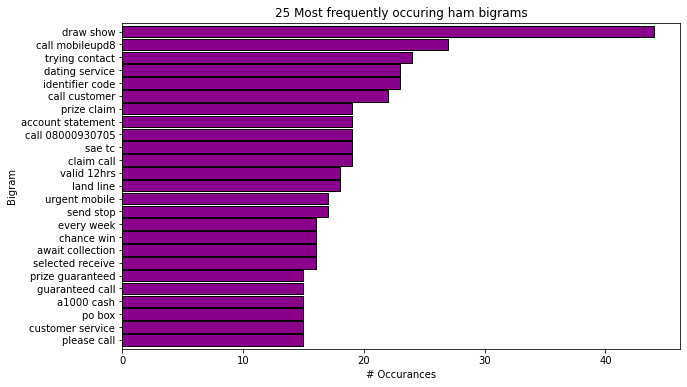

In [16]:
top_bigrams.sort_values().plot.barh(color='darkmagenta', ec='black', width=.9, figsize=(10, 6))

plt.title('25 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

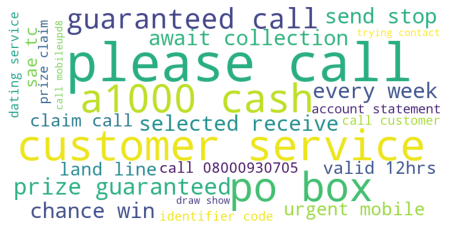

In [10]:
data = {k[0] + ' ' + k[1]: v for k, v in top_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

c. Is there any overlap in the bigrams for the spam data and the ham data?


In [26]:
top_spam_bigrams.head()

(please, call)         44
(customer, service)    27
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
dtype: int64

In [27]:
top_ham_bigrams.head()

(call, later)    52
(ill, call)      48
(let, know)      42
(sorry, ill)     39
(dont, know)     32
dtype: int64

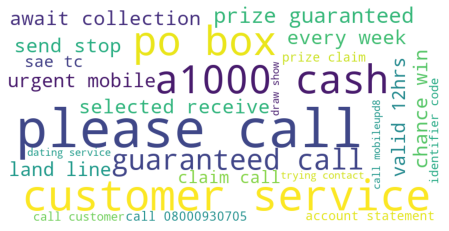

In [37]:
data = {k[0] + ' ' + k[1]: v for k, v in top_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

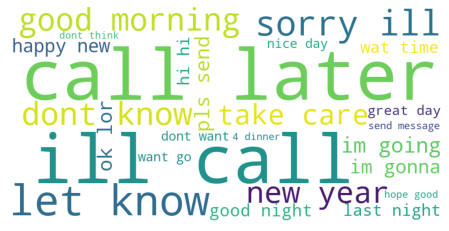

In [38]:
data = {k[0] + ' ' + k[1]: v for k, v in top_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.



In [32]:
spam_trigrams = nltk.ngrams(spam_words_str.split(), 3)
top_spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3))
                      .value_counts()
                      .head(25))

top_spam_trigrams.head()

(prize, guaranteed, call)     21
(call, customer, service)     15
(reply, call, 08000930705)    14
(land, line, claim)           14
(2003, account, statement)    13
dtype: int64

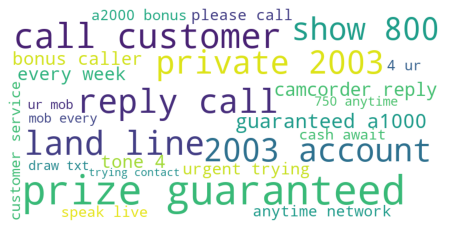

In [35]:
data = {k[0] + ' ' + k[1]: v for k, v in top_spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [33]:
ham_trigrams = nltk.ngrams(ham_words_str.split(), 3)
top_ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3))
                      .value_counts()
                      .head(25))

top_ham_trigrams.head()

(ill, call, later)      42
(sorry, ill, call)      38
(happy, new, year)      19
(pls, send, message)    13
(pick, phone, right)    12
dtype: int64

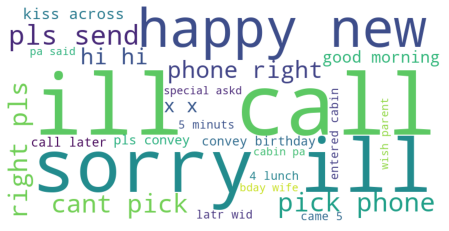

In [36]:
data = {k[0] + ' ' + k[1]: v for k, v in top_ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

2. Explore the blog articles using the techniques discussed in the exploration lesson.



3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.